In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
DF = pd.read_csv('ASD_jawarleaf1.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215100 entries, 0 to 215099
Data columns (total 2 columns):
Wavelength     215100 non-null int64
Reflectance    215100 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [19]:
a=np.linspace(0,215101,101)

a=a.astype(int)

In [20]:
df=list()

for i in a:
    df.append(DF.iloc[i:i+2151])

In [60]:
def NDVI(i):
    return ((df[i].loc[df[i]['Wavelength'] == 800, 'Reflectance'].iloc[0])-(df[i].loc[df[i]['Wavelength'] == 670, 'Reflectance'].iloc[0]))/((df[i].loc[df[i]['Wavelength'] == 800, 'Reflectance'].iloc[0])+(df[i].loc[df[i]['Wavelength'] == 670, 'Reflectance'].iloc[0]))
    

In [61]:
ndvi=[]
for i in range(0,100):
    m= NDVI(i)
    ndvi.append(m)

In [62]:
def MRESR(i):
    return ((df[i].loc[df[i]['Wavelength'] == 750, 'Reflectance'].iloc[0])-(df[i].loc[df[i]['Wavelength'] == 445, 'Reflectance'].iloc[0]))/((df[i].loc[df[i]['Wavelength'] == 705, 'Reflectance'].iloc[0])-(df[i].loc[df[i]['Wavelength'] == 445, 'Reflectance'].iloc[0]))
    
    

In [63]:
mresr=[]
for i in range(0,100):
    m= MRESR(i)
    mresr.append(m)

In [64]:
def RENDVI(i):
    return ((df[i].loc[df[i]['Wavelength'] == 752, 'Reflectance'].iloc[0])-(df[i].loc[df[i]['Wavelength'] == 701, 'Reflectance'].iloc[0]))/((df[i].loc[df[i]['Wavelength'] == 752, 'Reflectance'].iloc[0])+(df[i].loc[df[i]['Wavelength'] == 701, 'Reflectance'].iloc[0]))
    
    

In [65]:
rendvi=[]
for i in range(0,100):
    m= RENDVI(i)
    rendvi.append(m)

In [66]:
def SR(i):
    return (df[i].loc[df[i]['Wavelength'] == 864, 'Reflectance'].iloc[0])/(df[i].loc[df[i]['Wavelength'] == 671, 'Reflectance'].iloc[0])
    

In [67]:
sr=[]
for i in range(0,100):
    m= SR(i)
    sr.append(m)

In [68]:
def VOGI(i):
    return (df[i].loc[df[i]['Wavelength'] == 742, 'Reflectance'].iloc[0])/(df[i].loc[df[i]['Wavelength'] == 722, 'Reflectance'].iloc[0])
    

In [69]:
vogi=[]
for i in range(0,100):
    m= VOGI(i)
    vogi.append(m)

In [70]:
def MRENDVI(i):
    return ((df[i].loc[df[i]['Wavelength'] == 750, 'Reflectance'].iloc[0])-(df[i].loc[df[i]['Wavelength'] == 705, 'Reflectance'].iloc[0]))/((df[i].loc[df[i]['Wavelength'] == 750, 'Reflectance'].iloc[0])+(df[i].loc[df[i]['Wavelength'] == 705, 'Reflectance'].iloc[0])-(2*(df[i].loc[df[i]['Wavelength'] == 445, 'Reflectance'].iloc[0])))
    
    
    

In [71]:
mrendvi=[]
for i in range(0,100):
    m= MRENDVI(i)
    mrendvi.append(m)

In [72]:
def NR(i):
    
    k=0
    for n in range(600,699):
        k=k+(df[i].loc[df[i]['Wavelength'] == n, 'Reflectance'].iloc[0])
    return k
    

In [73]:
def DR(i):
    
    j=0
    for n in range(500,599):
        j=j+(df[i].loc[df[i]['Wavelength'] == n, 'Reflectance'].iloc[0])
    return j
    

In [74]:
def RGRI(i):
    return NR(i)/DR(i)
    

In [75]:
rgri=[]
for i in range(0,100):
    m= RGRI(i)
    rgri.append(m)

In [76]:
def REVSI(i):
    return (((df[i].loc[df[i]['Wavelength'] == 714, 'Reflectance'].iloc[0])+(df[i].loc[df[i]['Wavelength'] == 752, 'Reflectance'].iloc[0]))/2)-(df[i].loc[df[i]['Wavelength'] == 733, 'Reflectance'].iloc[0])

In [77]:
revsi=[]
for i in range(0,100):
    m= REVSI(i)
    revsi.append(m)

In [82]:
revsi=np.array(revsi)
rgri=np.array(rgri)
mrendvi=np.array(mrendvi)
vogi=np.array(vogi)
sr=np.array(sr)
ndvi=np.array(ndvi)
mresr=np.array(mresr)

In [83]:
columns=['mresr','revsi','rgri','mrendvi','vogi','sr','ndvi']

dfnnew=pd.DataFrame([mresr,revsi,rgri,mrendvi,vogi,sr,ndvi],columns)

In [84]:
dfnnew.T[:100]

,mresr,revsi,rgri,mrendvi,vogi,sr,ndvi
0,1.626794,-0.0225,0.797435,0.238616,1.091133,3.153846,0.515966
1,1.629808,-0.0225,0.797530,0.239488,1.091358,3.169014,0.517707
2,1.625000,-0.0220,0.797128,0.238095,1.091358,3.161972,0.516892
3,1.620192,-0.0220,0.797251,0.236697,1.088889,3.161972,0.516074
4,1.612440,-0.0215,0.796864,0.234432,1.089109,3.177305,0.517827
5,1.620192,-0.0225,0.796926,0.236697,1.089109,3.170213,0.517007
6,1.615385,-0.0220,0.796658,0.235294,1.089330,3.163121,0.517007
7,1.618357,-0.0210,0.796670,0.236162,1.086849,3.163121,0.516184
8,1.615385,-0.0220,0.796814,0.235294,1.087065,3.178571,0.517949
9,1.613527,-0.0215,0.796886,0.234750,1.087282,3.187050,0.517123


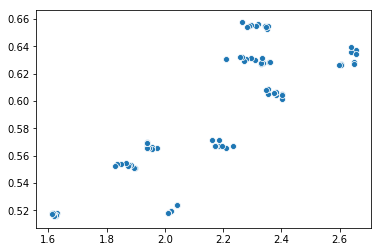

In [85]:
sns.scatterplot(mresr,ndvi)

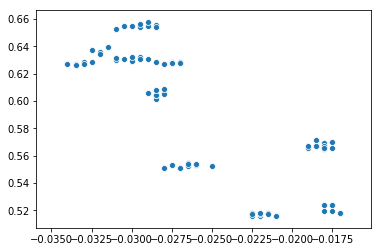

In [86]:
sns.scatterplot(revsi,ndvi)

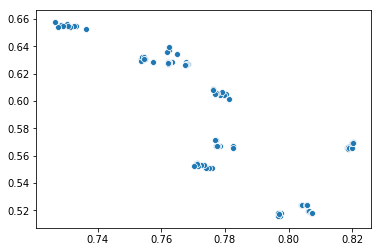

In [87]:
sns.scatterplot(rgri,ndvi)

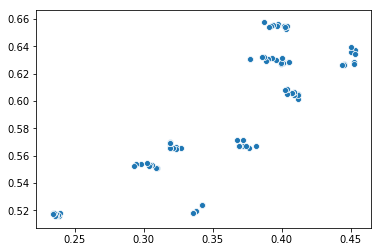

In [88]:
sns.scatterplot(mrendvi,ndvi)

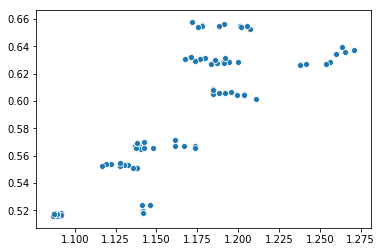

In [89]:
sns.scatterplot(vogi,ndvi)

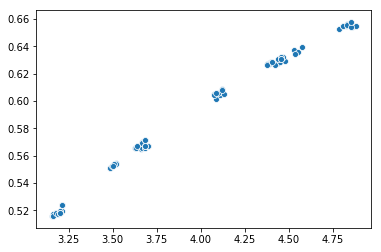

In [90]:
sns.scatterplot(sr,ndvi)

In [92]:
from scipy import stats

C:\Users\LENOVO\Anaconda3new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


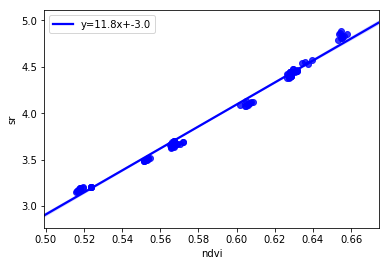

In [95]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['sr'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="sr", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

In [96]:
slope,intercept

(11.832464994058398, -3.005462817133436)

In [97]:
pred=list()
for x in ndvi:
    pred.append(11.832464994058398*x-3.005462817133436)
    
    
    

In [134]:
pred=np.array(pred)
#pred


In [133]:
#sr

In [101]:
from sklearn import metrics
metrics.r2_score(sr,pred)

0.9914635415235103

C:\Users\LENOVO\Anaconda3new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


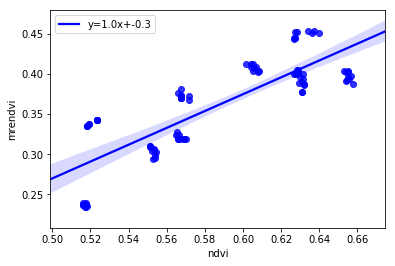

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['mrendvi'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="mrendvi", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

In [110]:
slope,intercept

(1.0484432875902376, -0.2543947602201714)

In [111]:
pred1=list()
for x in ndvi:
    pred1.append(1.0484432875902376*x-0.2543947602201714)
    
    
    

In [131]:
pred1=np.array(pred1)
#pred1

In [132]:
#mrendvi

In [115]:
from sklearn import metrics
metrics.r2_score(mrendvi,pred1)

0.6858364250066842

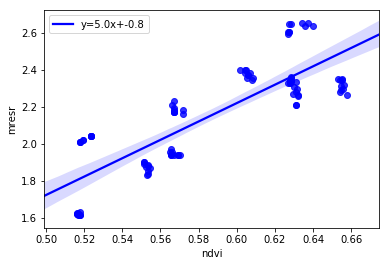

(4.9776224509293625, -0.7659104716088065)

In [117]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['mresr'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="mresr", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

slope,intercept

In [118]:
pred2=list()
for x in ndvi:
    pred2.append(4.9776224509293625*x-0.7659104716088065)
    
    
    

In [119]:
pred2=np.array(pred2)

In [120]:
from sklearn import metrics
metrics.r2_score(mresr,pred2)

0.6875356995217881

C:\Users\LENOVO\Anaconda3new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


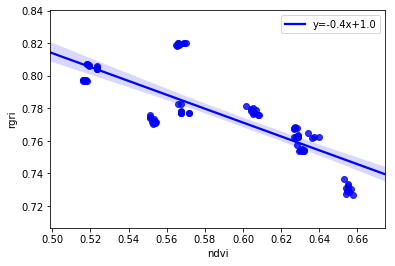

(-0.42576984200351137, 1.0267019269776938)

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['rgri'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="rgri", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

slope,intercept

In [128]:
pred3=list()
for x in ndvi:
    pred3.append(-0.42576984200351137*x+1.0267019269776938)
    
    
    

In [129]:
pred3=np.array(pred3)

In [130]:
from sklearn import metrics
metrics.r2_score(rgri,pred3)

0.6489631200629385

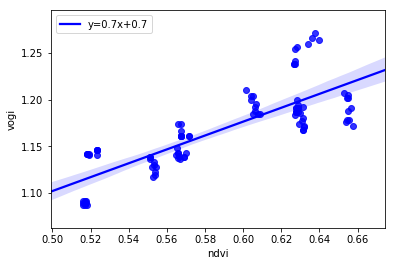

(0.7440404065684972, 0.7298672051833488)

In [136]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['vogi'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="vogi", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

slope,intercept

In [138]:
pred4=list()
for x in ndvi:
    pred4.append(0.7440404065684972*x+0.7298672051833488)
    
    
    

In [141]:
pred4=np.array(pred4)


In [142]:
from sklearn import metrics
metrics.r2_score(vogi,pred4)

0.6468720096984866

C:\Users\LENOVO\Anaconda3new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


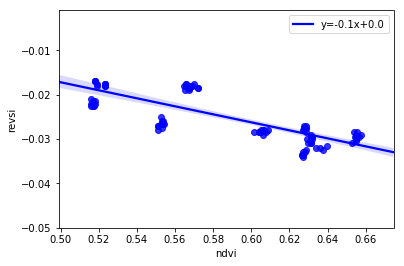

(-0.09035634213165027, 0.027984884809946)

In [143]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnnew.T['ndvi'],dfnnew.T['revsi'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ndvi", y="revsi", data=dfnnew.T, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#enter image description here

slope,intercept

In [146]:
pred5=list()
for x in ndvi:
    pred5.append(-0.09035634213165027*x+0.027984884809946)
    
    
    

In [147]:
pred5=np.array(pred5)


In [148]:
from sklearn import metrics
metrics.r2_score(revsi,pred5)

0.608307805358794